# Calculations

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cols = ['h1', 'h2', 'h3', 'h4', 'h5']

df = pd.read_csv('Roughness_peak.csv')
df

,N,x,h1,h2,h3,h4,h5
0,0,0.000000,149.680054,149.777054,142.113602,139.009399,152.008194
1,1,2.599860,144.732758,146.381851,138.524384,135.226181,147.157898
2,2,5.199720,139.106415,142.889648,134.741150,132.024979,142.598618
3,3,7.799580,133.286057,137.457306,130.181870,129.890854,139.106415
4,4,10.399440,126.495651,130.472885,126.786667,128.241760,136.487259
...,...,...,...,...,...,...,...
955,955,2482.866211,1.940117,9.894598,10.767652,18.237103,6.887416
956,956,2485.466064,2.716164,9.409569,12.513757,15.326927,5.335323
957,957,2488.065918,3.589217,8.633522,13.483815,11.931722,3.977241
958,958,2490.665771,4.171252,8.439510,13.289804,9.021545,2.522152


## Peak

In [3]:
# position of markers for peak
sp = 35
ep = 127

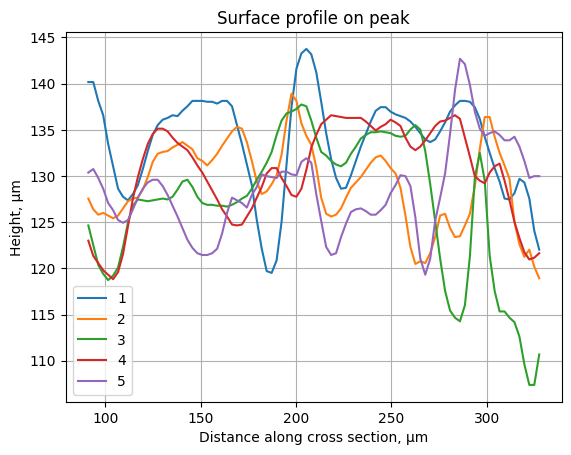

In [4]:
plt.figure()
plt.grid()
plt.xlabel(r'Distance along cross section, μm')
plt.ylabel('Height, μm')
plt.title('Surface profile on peak')
for col in cols:
    plt.plot(df['x'][sp:ep], df[col][sp:ep], label=col[1:])
plt.legend()
plt.show()

In [5]:
peaksdf = pd.DataFrame(columns=['Sr. No.', 'Ra (μm)', 'Rq (μm)', '%error Ra', '%error Rq'])

hpeaks = []
raorig = {'h1': 4.28, 'h2': 3.153, 'h3': 6.17, 'h4': 3.755, 'h5': 3.407}
rqorig = {'h1': 5.366, 'h2': 3.965, 'h3': 6.787, 'h4': 4.396, 'h5': 4.222}
horigmean = np.array([132.75, 128.66, 127.04, 130.85, 128.58]).mean()

for col in cols:
    h = np.array(df[col][sp:ep])
    mu = h.mean()
    hpeaks.append(mu)
    z = h - mu
    ra = np.abs(z).mean()
    rq = z.std()
    err_ra = np.abs(ra - raorig[col])/raorig[col] * 100
    err_rq = np.abs(rq - rqorig[col])/raorig[col] * 100
    peaksdf.loc[len(peaksdf)] = [col[1:], ra.round(3), rq.round(3), err_ra.round(2), err_rq.round(2)]

peaksdf

,Sr. No.,Ra (μm),Rq (μm),%error Ra,%error Rq
0,1,4.291,5.263,0.26,2.40
1,2,3.771,4.490,19.59,16.66
2,3,5.952,7.557,3.53,12.48
3,4,4.310,5.142,14.79,19.87
4,5,3.572,4.652,4.86,12.63


In [6]:
mup = np.array(hpeaks).mean()
peakerr = np.abs(mup - horigmean) / horigmean * 100
print('Average height on peak =', mup.round(3), 'μm')
print('%error in average height on peak =', peakerr.round(2), '%')

Average height on peak = 129.744 μm
%error in average height on peak = 0.13 %


## Valley

In [7]:
# position of markers for valley
sv = 711
ev = 827

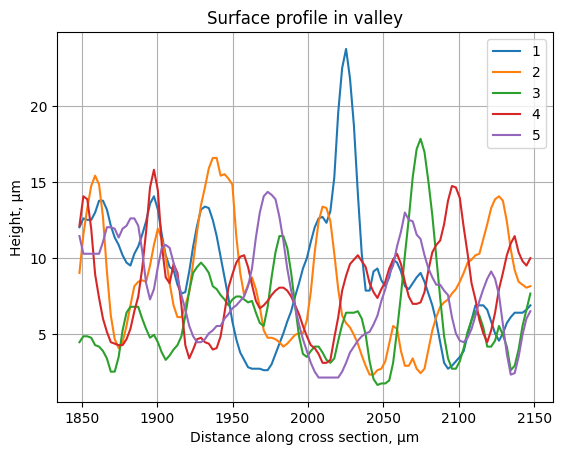

In [8]:
plt.figure()
plt.grid()
plt.xlabel(r'Distance along cross section, μm')
plt.ylabel('Height, μm')
plt.title('Surface profile in valley')
for col in cols:
    plt.plot(df['x'][sv:ev], df[col][sv:ev], label=col[1:])
plt.legend()
plt.show()

In [9]:
valleydf = pd.DataFrame(columns=['Sr. No.', 'Ra (μm)', 'Rq (μm)', '%error Ra', '%error Rq'])

hvalley = []
raorig = {'h1': 2.632, 'h2': 3.178, 'h3': 2.406, 'h4': 2.296, 'h5': 2.549}
rqorig = {'h1': 3.899, 'h2': 3.744, 'h3': 3.204, 'h4': 2.917, 'h5': 3.050}
valleyhmean = np.array([8.499, 8.359, 9.632, 8.399, 7.498]).mean()

for col in cols:
    h = np.array(df[col][sv:ev])
    mu = h.mean()
    hvalley.append(mu)
    z = h - mu
    ra = np.abs(z).mean()
    rq = z.std()
    err_ra = np.abs(ra - raorig[col])/raorig[col] * 100
    err_rq = np.abs(rq - rqorig[col])/raorig[col] * 100
    valleydf.loc[len(valleydf)] = [col[1:], ra.round(3), rq.round(3), err_ra.round(2), err_rq.round(2)]

valleydf

,Sr. No.,Ra (μm),Rq (μm),%error Ra,%error Rq
0,1,3.302,4.251,25.46,13.36
1,2,3.204,3.858,0.83,3.60
2,3,2.383,3.235,0.95,1.29
3,4,2.375,2.961,3.43,1.91
4,5,2.829,3.315,10.97,10.39


In [10]:
muv = np.array(hvalley).mean()
valleyherr = np.abs(muv - valleyhmean) / valleyhmean * 100

print('Average height in valley =', muv.round(3), 'μm')
print('%error in valley height =', valleyherr.round(2), '%')

Average height in valley = 7.858 μm
%error in valley height = 7.3 %


## Step height

In [11]:
step = mup - muv
print('Step height =', step.round(3), 'μm')

Step height = 121.886 μm


In [12]:
steporig = np.array([124.25, 120.3, 117.4, 122.45, 121.09])
steperr = (step - steporig.mean()) / steporig.mean() * 100

print('Error in step height =', steperr.round(2), '%')

Error in step height = 0.65 %
